<a href="https://colab.research.google.com/github/Manishagoyal48/Mobile_price_prediction/blob/main/Mobile_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install xgboost

In [ ]:
pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     - 17.9 MB 24.1 MB/s 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 62.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 36.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 2.3 MB/s eta 0:00:00
  Created wheel for ydata-profiling: filename=ydata_profiling-0.0.dev0-py2.py3-none-any.whl size=398767 sha256=54a053c97d1801aef8530f64f53bc83e72592170763be611c397a62acea2417c
  Stored in directory: /tmp/pip-ephem-wheel-cache-6pckg5pj/wheels/71/3c/c6/1dde962797c52d907d477fe1b35111dccb8c4574b0ad7a8cb7
Successfully built ydata-profiling


In [ ]:
#Basic Operations
import pandas as pd # data operation and data Wrangling
import numpy as np # number operation in array

#visualizing libraries
import matplotlib.pyplot as plt # data visualisation
import seaborn as sns # data visualisation


#data preprocessing
from sklearn.preprocessing import StandardScaler # standardization for feature scaling
from sklearn.model_selection import GridSearchCV # for hyperparameter tunning
from sklearn.model_selection import train_test_split # split the data into train and test
from sklearn.model_selection import learning_curve # check overfitting
from sklearn.ensemble import IsolationForest # anomaly detection
from sklearn.decomposition import PCA # principal component analysis
from sklearn.model_selection import RandomizedSearchCV #for hyperparameter tunning

#Model
from sklearn.tree import DecisionTreeClassifier #Decisiontree
from sklearn.ensemble import RandomForestClassifier # Randomforest
from sklearn.neighbors import KNeighborsClassifier #knn
from sklearn.ensemble import GradientBoostingClassifier #gradientboosting
from sklearn.linear_model import LogisticRegression #logistic
from xgboost import XGBClassifier # xgboost
from sklearn.naive_bayes import GaussianNB # naive bayes
from sklearn.svm import SVC # support vector machine
from sklearn.ensemble import StackingClassifier # stacking
from sklearn.ensemble import BaggingClassifier # Bagging

#evaluators
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score,classification_report # for evaluation metrics



import warnings
warnings.filterwarnings('ignore') # ignore the warning

In [29]:
#loading the data
df = pd.read_csv('/data_mobile_price_range.csv')

In [30]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
df.shape

(2000, 21)

In [ ]:
df.size

42000

In [ ]:

df.isnull().sum()

,0
battery_power,0
blue,0
clock_speed,0
dual_sim,0
fc,0
four_g,0
int_memory,0
m_dep,0
mobile_wt,0
n_cores,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


In [ ]:

df['price_range'].value_counts()

,count
price_range,
1,500
2,500
3,500
0,500


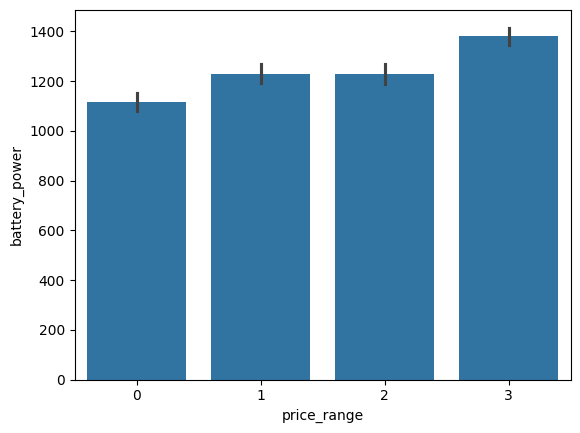

In [ ]:
sns.barplot(data=df,y='battery_power',x='price_range')
plt.show()

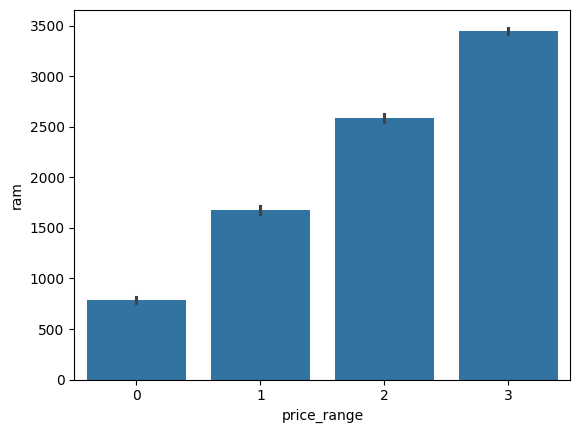

In [ ]:

sns.barplot(data=df,y='ram',x='price_range')
plt.show()

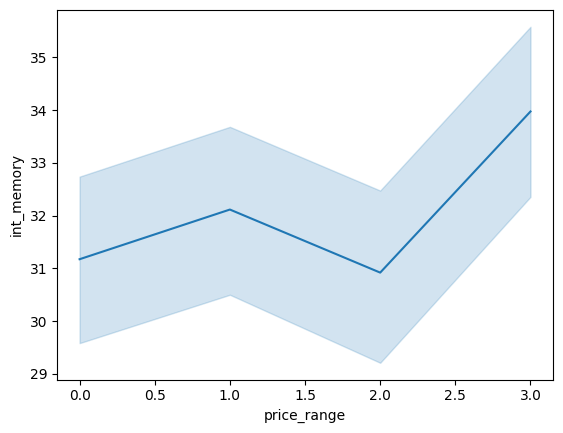

In [ ]:

sns.lineplot(data=df,x='price_range',y='int_memory')
plt.show()

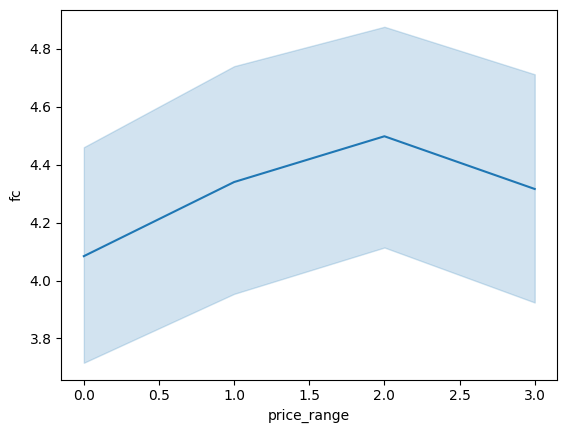

In [ ]:
sns.lineplot(data=df,x='price_range',y='fc')
plt.show()

<Axes: xlabel='three_g', ylabel='count'>

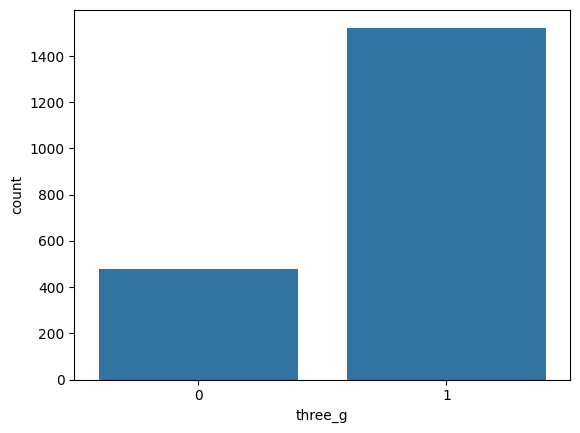

In [ ]:
sns.countplot(data=df,x='three_g')

In [ ]:
df['three_g'].value_counts()

,count
three_g,
1,1523
0,477


<Axes: xlabel='four_g', ylabel='count'>

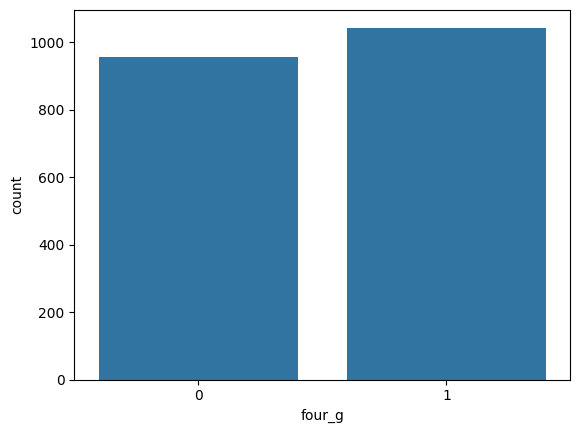

In [ ]:
sns.countplot(data=df,x='four_g')

In [ ]:
df['four_g'].value_counts()

,count
four_g,
1,1043
0,957


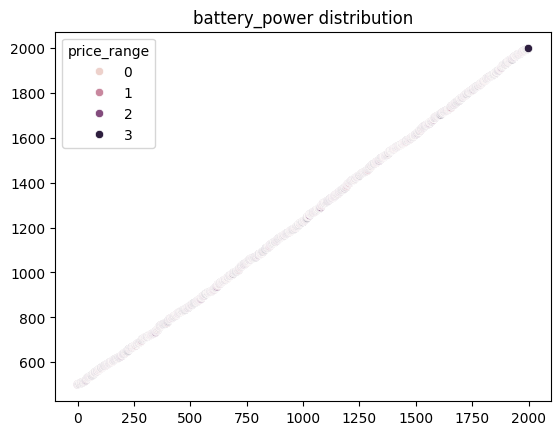

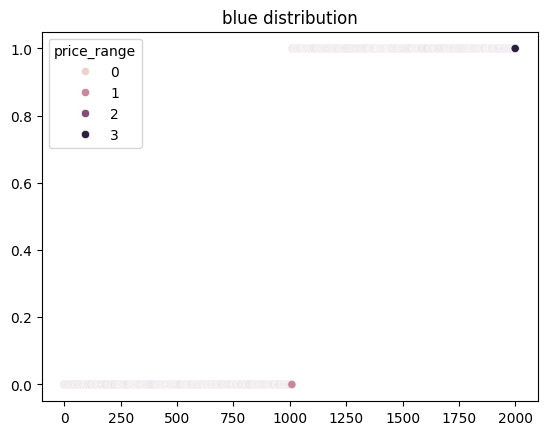

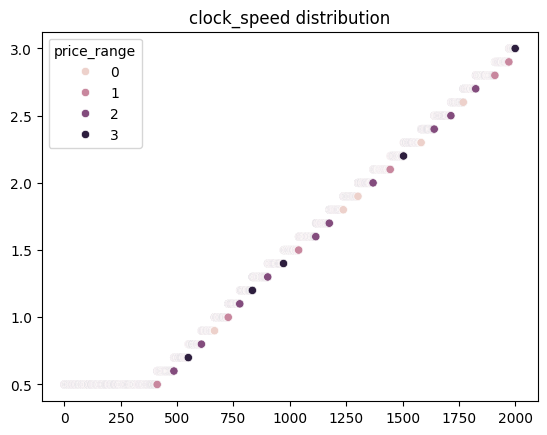

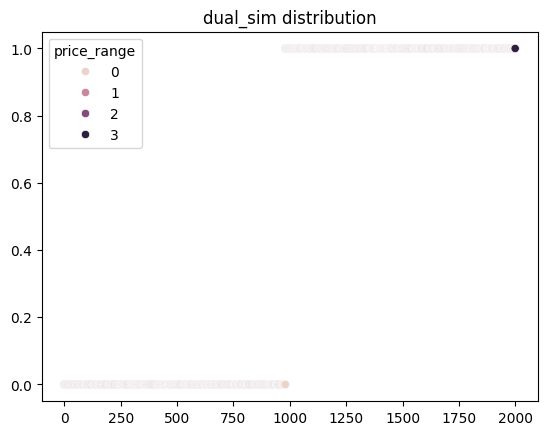

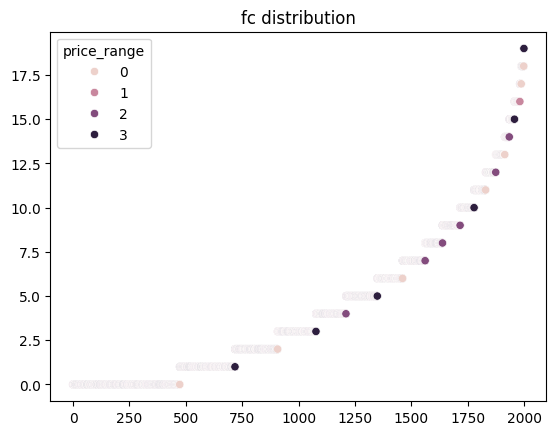

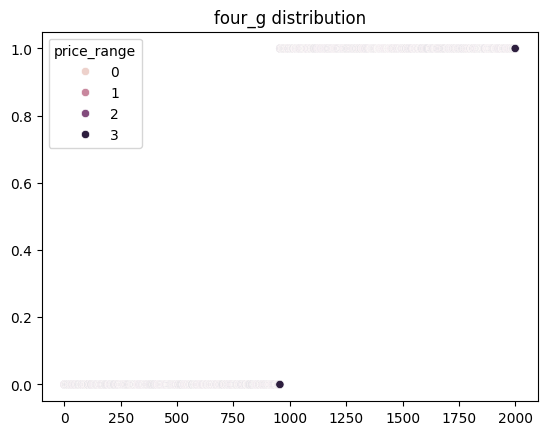

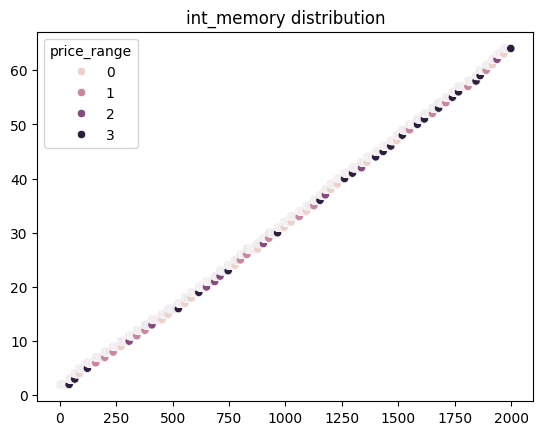

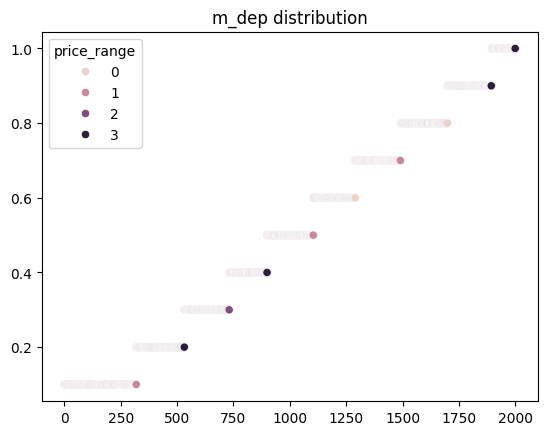

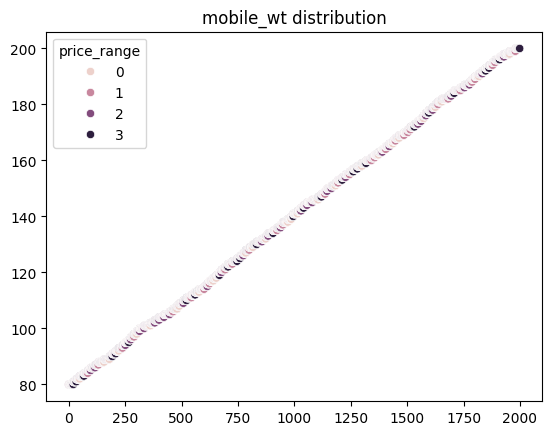

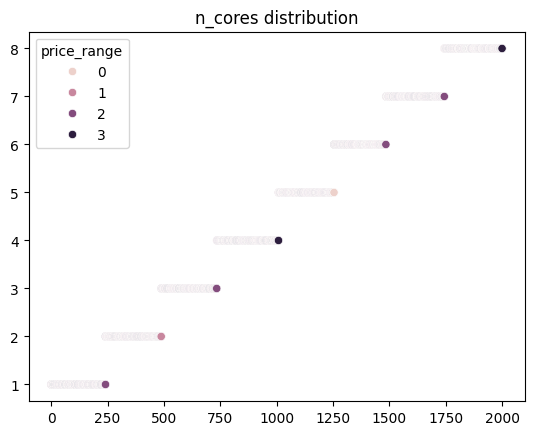

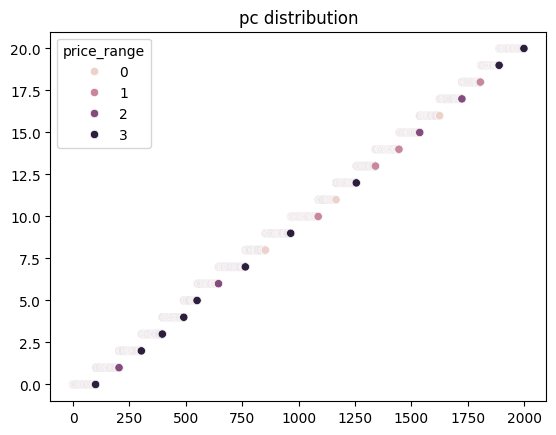

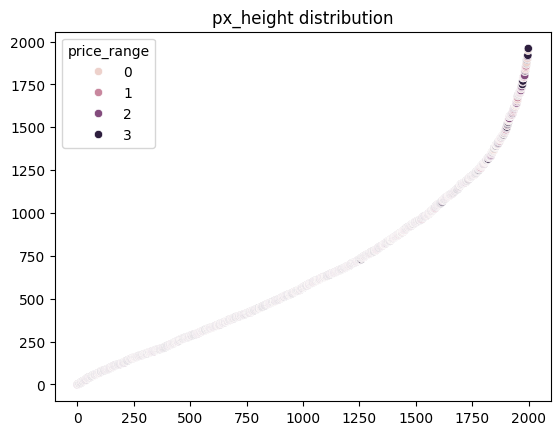

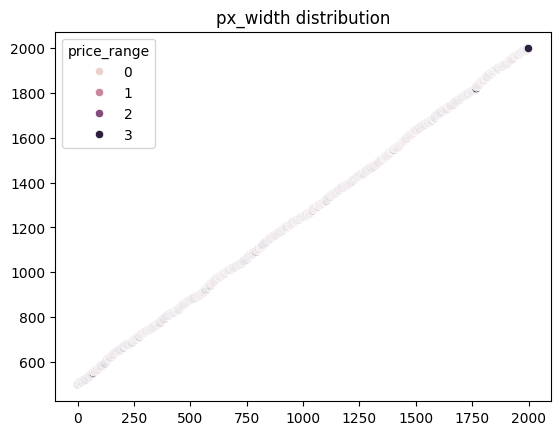

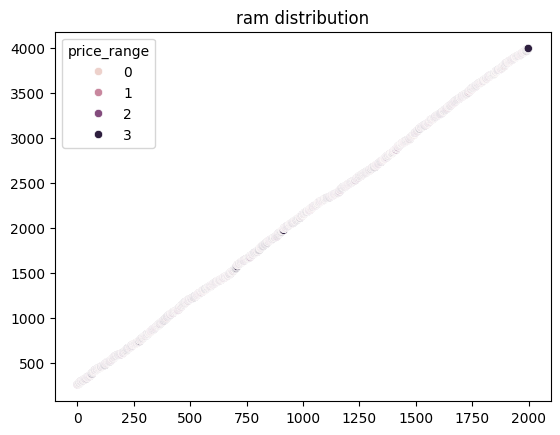

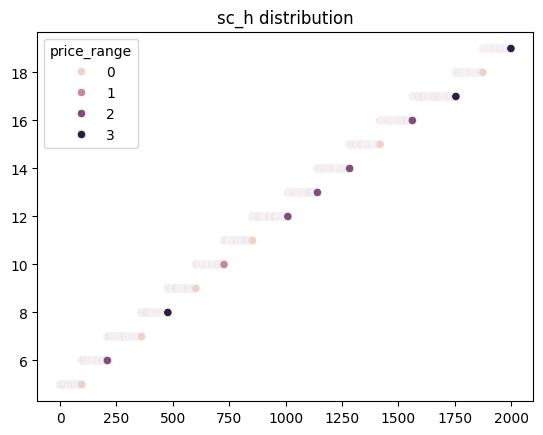

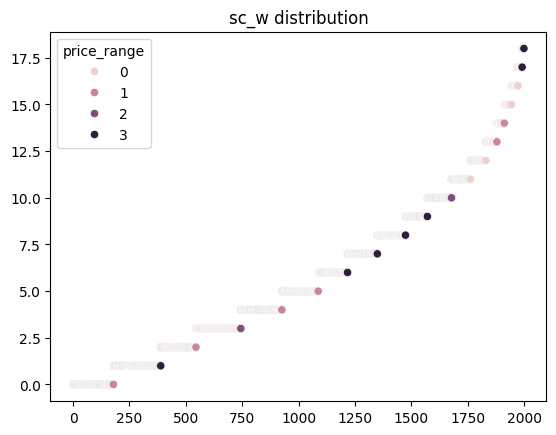

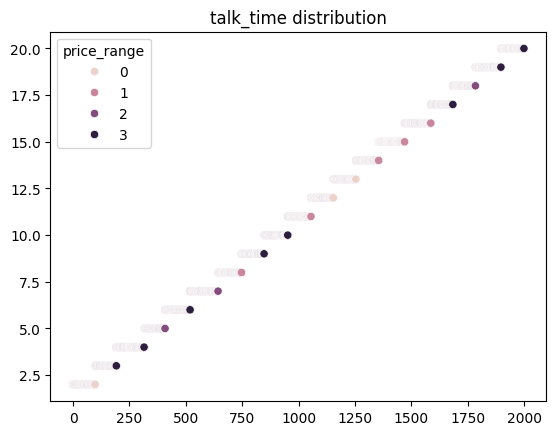

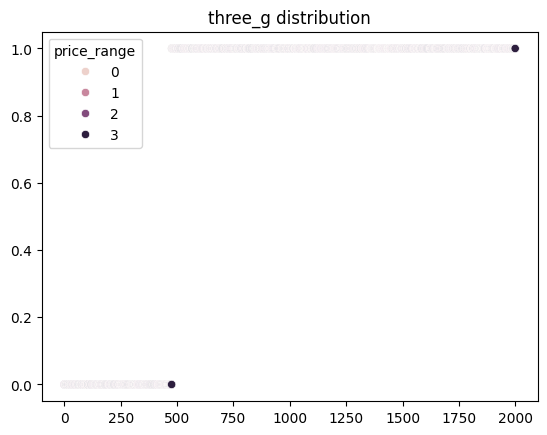

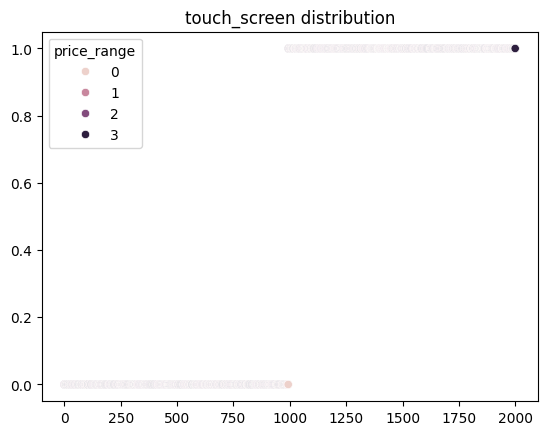

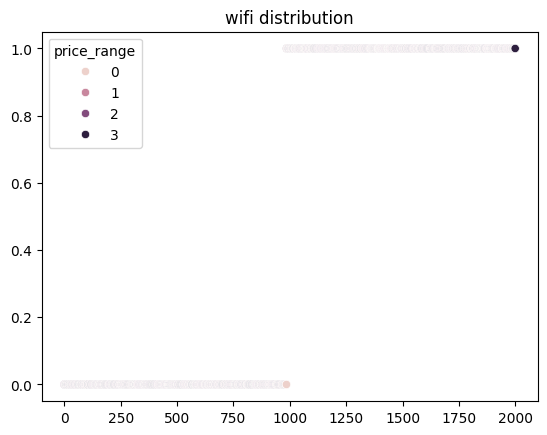

In [ ]:
#checking outliers
for i in (df.describe().columns[:-1]):
  sns.scatterplot(df,x=range(len(df[i])),y=np.sort(df[i]),hue='price_range')
  plt.title(i+' distribution')
  plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

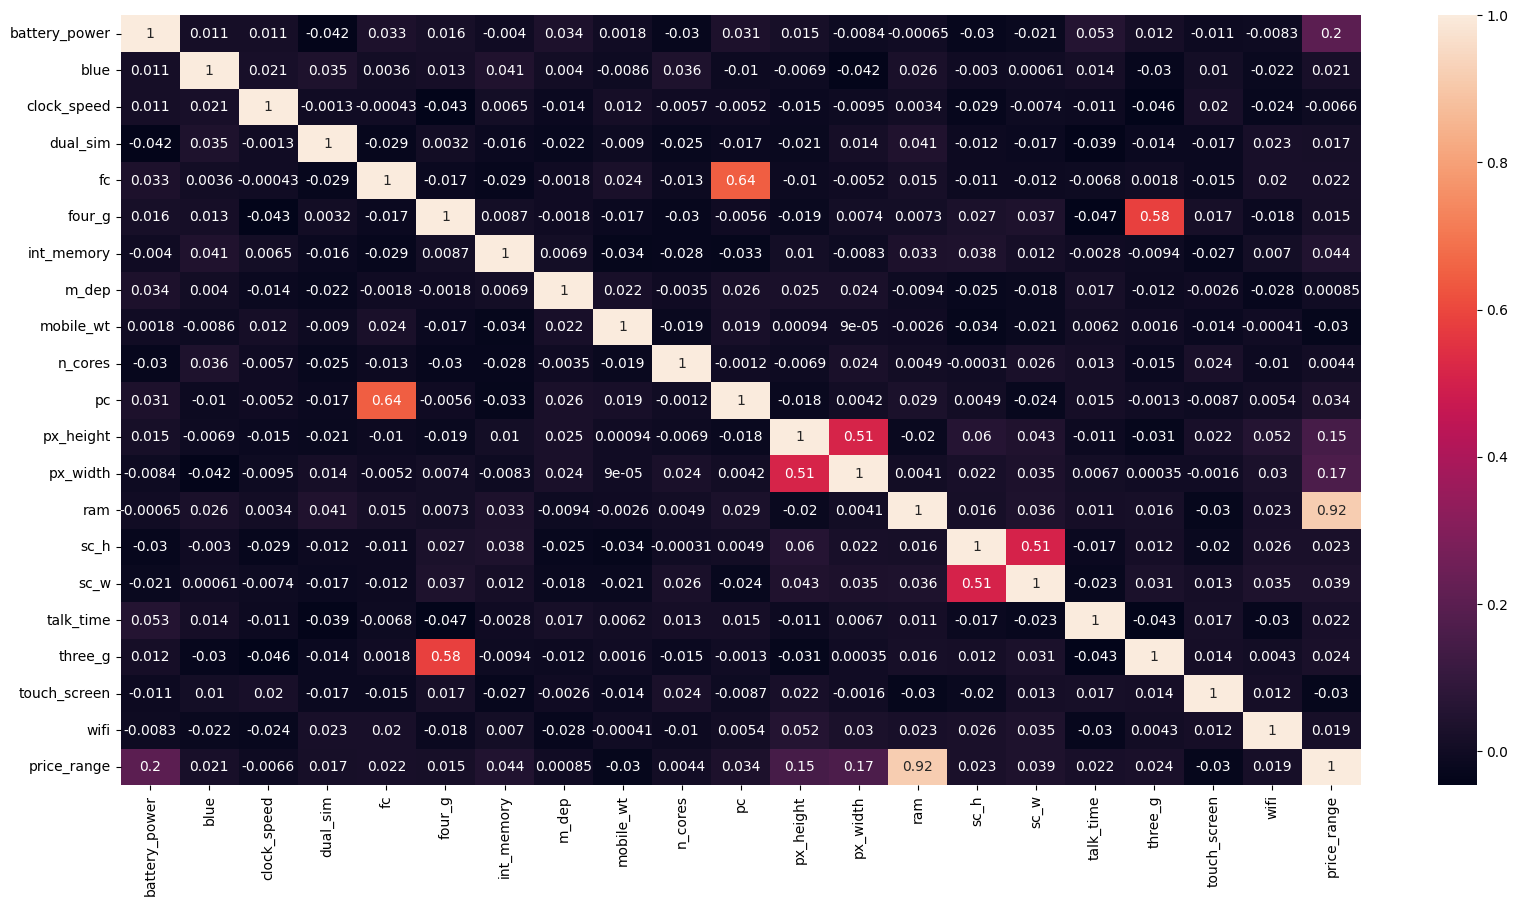

In [ ]:

#multicollinearity
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)
plt.show

In [31]:
#Created a feature by combining px_height and px_width, hence we dropped both features.
df['Pixels Dimension']=df['px_height']*df['px_width']

df.drop(columns=['px_height','px_width'],inplace=True)


#Using function converted MB into GB.
def change(x):
  return x/1000


#Applied the above function
df['ram']=df['ram'].apply(change)


# 3G will work on 4G phones, but 4G won't work on 3G phones
df.drop(columns=['three_g'],inplace=True)


#Since most of the smartphones comes with bluetooth feature, hence we dropped Bluetooth feature.
df.drop(columns=['blue'],inplace=True)


#Created a feature by combining sc_h and sc_w, hence we dropped both features.
df['Screen Dimension'] = df['sc_h']* df['sc_w']
df.drop(columns=['sc_h','sc_w'],inplace=True)


df.shape

(2000, 17)

In [40]:
from sklearn.preprocessing import StandardScaler

# Created an object for StandardScaler
stand = StandardScaler()

# Scaling
x_train = stand.fit_transform(x_train)
x_test = stand.transform(x_test)


In [33]:
#Defined price_range as dependent variable and rest all the features as independent variable
dependent_variable ='price_range'
independent_varaible = list(set(df.columns.tolist())-{dependent_variable})


# stored the independent and dependent values in x and y variable respectively
x=df[independent_varaible].values
y=df[dependent_variable].values


# split the data into 4 parts x_train,x_test,y_train,y_test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0,stratify=y)


In [58]:
import numpy as np
from sklearn.model_selection import learning_curve
# A function to check overfitting using learning curve
def check_overfit(model_name):
  train_sizes,train_scores,test_scores = learning_curve(model_name,x_train,y_train,cv=5)
  train_scores_mean = np.mean(train_scores,axis=1)
  test_scores_mean = np.mean(test_scores,axis=1)
  plt.plot(train_sizes,train_scores_mean,label='Training score')
  plt.plot(train_sizes,test_scores_mean,label='Test score')

  plt.title("learning curve")
  plt.xlabel("training set size")
  plt.ylabel("Accuracy score")
  plt.legend(loc='best')
  plt.show()

In [ ]:
# created an object for decision tree classifier and then fit the train dataset into this model.
dec =DecisionTreeClassifier()
dec.fit(x_train,y_train)


DecisionTreeClassifier()

In [ ]:
#Predicting the model and checking the accuracy of the model
dec_pred = dec.predict(x_test)
dec_pred_accuracy = accuracy_score(dec_pred,y_test)
print(dec_pred_accuracy)

0.852


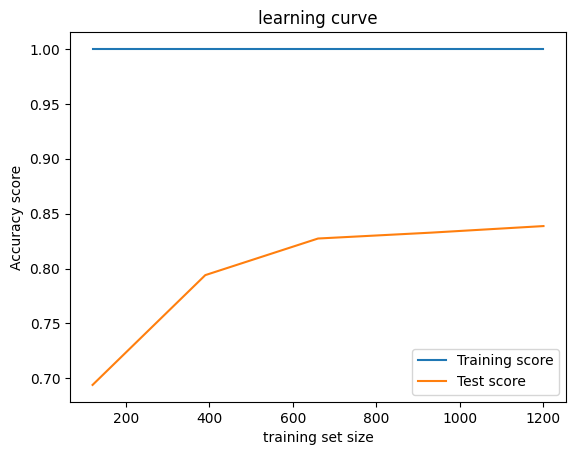

In [ ]:
#learning curve
check_overfit(dec)


In [ ]:
#Set the parameters in the model
param_grid=param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [ 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_leaf_nodes': [10, 20],
    'min_impurity_decrease': [0, 0.1, 0.2]
}


#hyperparameter tunning using GridSearchCV
pre_dec = DecisionTreeClassifier()
pre_dec = GridSearchCV(pre_dec,param_grid=param_grid,scoring='accuracy',cv=5)
pre_dec.fit(x_train,y_train)
pre_dec_pred = pre_dec.predict(x_test)
pre_dec_accuracy = accuracy_score(pre_dec_pred,y_test)
pre_dec_accuracy

0.832

In [ ]:
#Got the best parameter through hyperparameter tunning
pre_dec.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_leaf_nodes': 20,
 'min_impurity_decrease': 0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

In [ ]:
#Set the best parameter in this model
dec =DecisionTreeClassifier(criterion='gini',
 max_depth= 10,
 max_leaf_nodes= 20,
 min_impurity_decrease= 0,
 min_samples_leaf= 1,
 min_samples_split= 2,
 splitter= 'best')
dec.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=20, min_impurity_decrease=0)

In [ ]:
#Predicting the model and checking accuracy after hyperparameter tunning
dec_pred = dec.predict(x_test)
dec_pred_accuracy = accuracy_score(dec_pred,y_test)
print(dec_pred_accuracy)

0.832


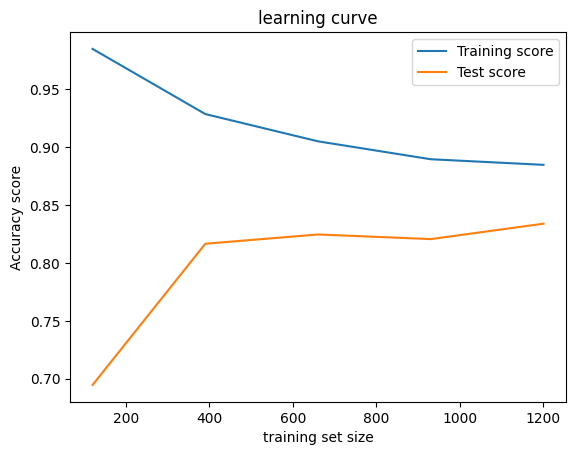

In [ ]:
#Model is performing well after hyperparameter tunning.
check_overfit(dec)

In [ ]:
#Created an object for Random forest classifier, then trained the model and checking the accuracy of the model.
rf_tune = RandomForestClassifier(max_depth= 15,
 max_features= 'sqrt',
 min_samples_leaf= 1,
 min_samples_split= 2,
 n_estimators= 200)
rf_tune.fit(x_train,y_train)
rf_tune_pred = rf_tune.predict(x_test)
rf_tune_accuracy = accuracy_score(rf_tune_pred,y_test)
rf_tune_accuracy

0.888

In [38]:
#find the value of k.
error=[]
for i in range(1,1000):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train,y_train)
  knn_pred = knn.predict(x_test)
  error.append(np.mean(knn_pred!=y_test))


In [42]:
#find the value of k.
error=[]
for i in range(1,1000):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train,y_train)
  knn_pred = knn.predict(x_test)
  error.append(np.mean(knn_pred!=y_test))

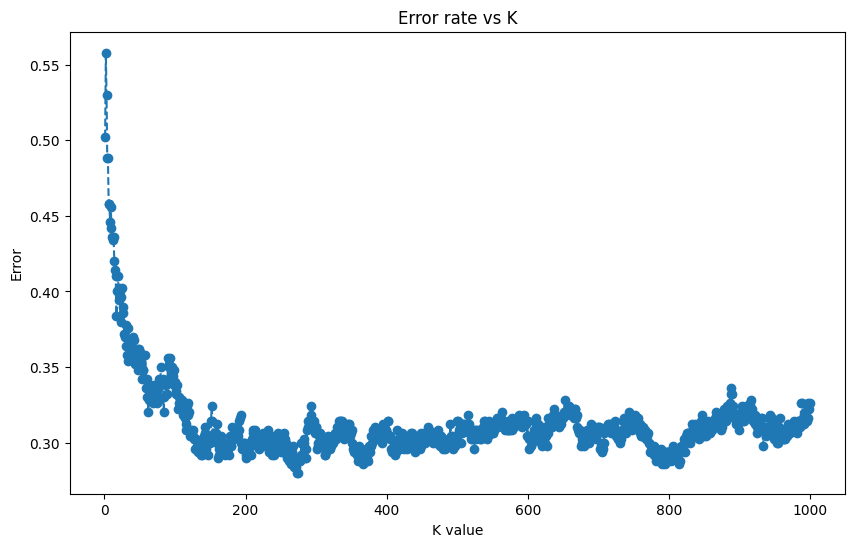

In [45]:
import matplotlib.pyplot as plt

# Plotting line plot
plt.figure(figsize=(10,6))
plt.plot(range(1, 1000), error,
         linestyle='dashed', marker='o')

plt.title('Error rate vs K')
plt.xlabel('K value')
plt.ylabel('Error')

plt.show()


In [47]:
#Created an object for KNN.
knn = KNeighborsClassifier(n_neighbors=273,p=1,weights='distance',metric= 'manhattan')

In [48]:
# Trained the model
knn.fit(x_train,y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=273, p=1,
                     weights='distance')

In [49]:

#Model Prediction
knn_pred = knn.predict(x_test)

In [53]:
from sklearn.metrics import accuracy_score

knn_accuracy = accuracy_score(y_test, knn_pred)
knn_accuracy


0.78

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_scorer.py", line 472, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/neighbors/_classification.py", line 446, in score
    return super().score(X, y, sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 572, in score
    return accuracy_score(y, self.predict(X), sample_weig

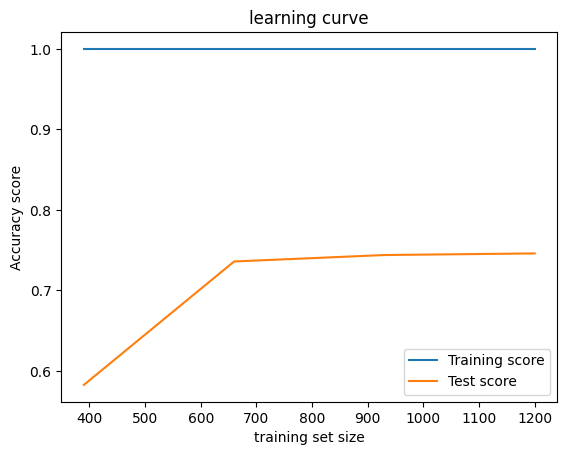

In [59]:
check_overfit(knn)

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
#Set the parameters in the model
parameter = {'penalty':['l1', 'l2', 'elasticnet'],'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],'C':[0.000001,0.00001,0.0001,0.001,0.01,0.1,1,10]}


#hyperparameter tuning in the model
logi = LogisticRegression()
logi = GridSearchCV(logi,param_grid=parameter,scoring='accuracy',cv=5)


#Trained the model
logi.fit(x_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which 

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='accuracy')

In [63]:
#Got the best parameter
logi.best_params_

{'C': 1, 'penalty': 'l1', 'solver': 'saga'}

In [64]:
#Applied best parameter
logi_tune = LogisticRegression(C= 1, penalty= 'l1', solver= 'saga')

In [65]:
#Trained the using best parameters
logi_tune.fit(x_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=1, penalty='l1', solver='saga')

In [66]:
#Predicting the model and checked the accuracy of the model
logi_tune_pred = logi_tune.predict(x_test)
logi_tune_accuracy = accuracy_score(logi_tune_pred,y_test)
logi_tune_accuracy

0.948

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which 

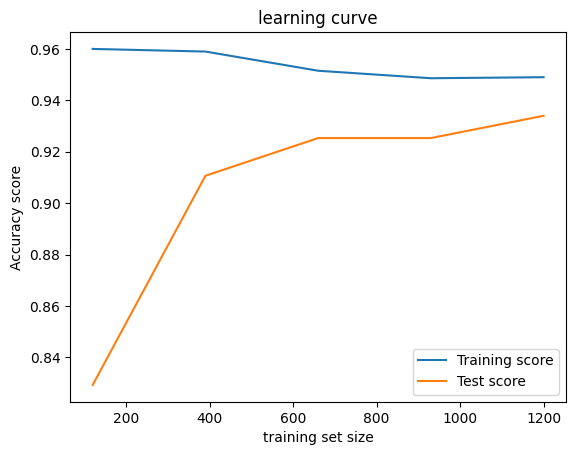

In [67]:
#Learning Curve
check_overfit(logi_tune)

In [69]:
from sklearn.naive_bayes import GaussianNB
#Created an object for GaussianNB
nb=GaussianNB()

In [70]:
#Trained the model
nb.fit(x_train,y_train)

GaussianNB()

In [71]:
#Model Prediction
nb_pred = nb.predict(x_test)

In [72]:
#Checked the accuracy of the model
nb_accuracy = accuracy_score(nb_pred,y_test)
nb_accuracy

0.804

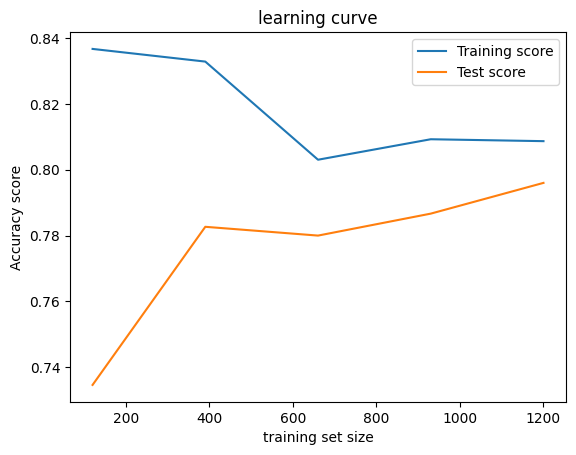

In [73]:
#Learning Curve
check_overfit(nb)

In [78]:
#Set the parameters
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
  "min_child_weight" : [ 1, 3, 5, 7 ],
  "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]

 }

from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
#Hyperparameter tunning and trained the model
xgb= XGBClassifier()


random_search= RandomizedSearchCV(xgb,param_distributions=params,n_iter=5,scoring='accuracy',n_jobs=-1,cv=5,verbose=3)
random_search.fit(x_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constrain...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='accuracy', verbose=3)

In [79]:
#Got the best parameters
random_search.best_params_

{'min_child_weight': 5,
 'max_depth': 12,
 'learning_rate': 0.3,
 'gamma': 0.0,
 'colsample_bytree': 0.5}

In [80]:
#Best Estimator
random_search.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=0.0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.3, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=12,
              max_leaves=None, min_child_weight=5, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [81]:
#Model prediction
xgb_pred = random_search.predict(x_test)


#Checked the accuracy
xg_boost_accuracy = accuracy_score(xgb_pred,y_test)


xg_boost_accuracy

0.89

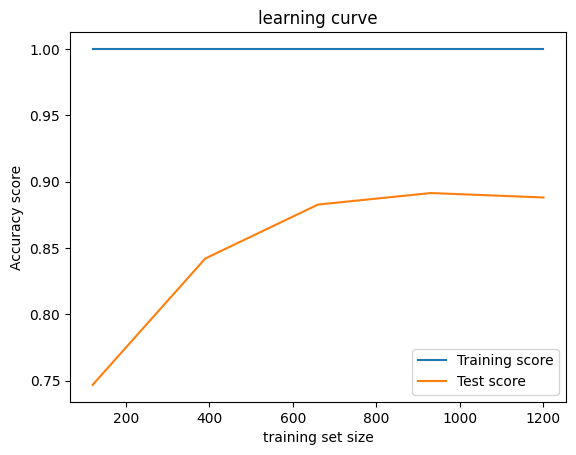

In [83]:
#Learning Curve
check_overfit(xgb)

In [85]:
#Set the parameters
from sklearn.svm import SVC
svc_params = {'C':range(5,10,2),
              'kernel':['rbf','linear', 'poly', 'sigmoid',]}


#Hyperparameter tunning and trained the model
svc_cv  = GridSearchCV(SVC(),param_grid=svc_params,cv=5,verbose=True,scoring='accuracy',n_jobs=-1)
svc_cv.fit(x_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': range(5, 10, 2),
                         'kernel': ['rbf', 'linear', 'poly', 'sigmoid']},
             scoring='accuracy', verbose=True)

In [86]:
#got best parameters
svc_cv.best_params_

{'C': 5, 'kernel': 'linear'}

In [87]:
#Trained the model after using best parameters
scv =SVC(C=5,kernel='linear')
scv.fit(x_train,y_train)

SVC(C=5, kernel='linear')

In [88]:
#Model prediction
scv_pred = scv.predict(x_test)


#Checked the accuracy of the model
scv_accuracy = accuracy_score(scv_pred,y_test)


scv_accuracy

0.942

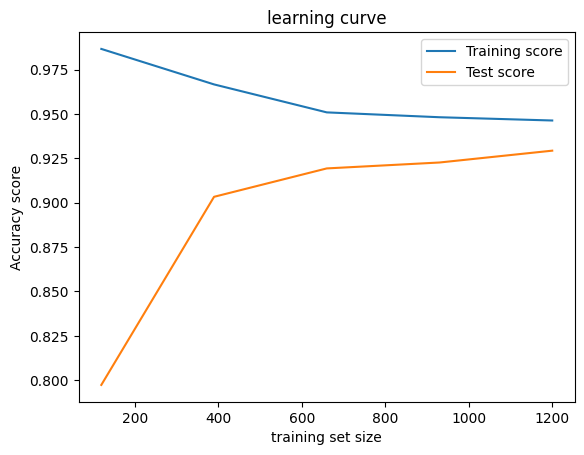

In [89]:
#Learning curve
check_overfit(scv)

In [96]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

estimators = [
    ('gbc', GradientBoostingClassifier()),
    ('xgb', XGBClassifier(
        colsample_bytree=0.7, gamma=0.3, learning_rate=0.25,
        max_depth=15, min_child_weight=3, objective='multi:softprob'
    )),
    ('bc', BaggingClassifier(
        estimator=SVC(C=5, kernel='linear'),  # <- changed here
        n_estimators=10,
        bootstrap=True,
        bootstrap_features=True,
        random_state=42
    ))
]


In [98]:
from sklearn.ensemble import StackingClassifier
#Hyper parameter tunning
sc= StackingClassifier(estimators=estimators,passthrough=True,n_jobs=-1)


#Trained the model
sc.fit(x_train,y_train)

StackingClassifier(estimators=[('gbc', GradientBoostingClassifier()),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=0.7, device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None,
                                              feature_weights=None, gamma=0.3,
                                              grow_policy=None,
                                              imp...
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None, max_depth=15,
                                              max_leaves=None,
                                              min_child_weight=3, missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None, ...)),
                               ('bc',
                                BaggingClassifier(bootstrap_features=True,
                                                  estimator=SVC(C=5,
                                                                kernel='linear'),
                                                  random_state=42))],
                   n_jobs=-1, passthrough=True)

In [99]:
#Model prediction
sc_pred = sc.predict(x_test)


#Checked accuracy
sc_accuracy=accuracy_score(sc_pred,y_test)


sc_accuracy

0.936

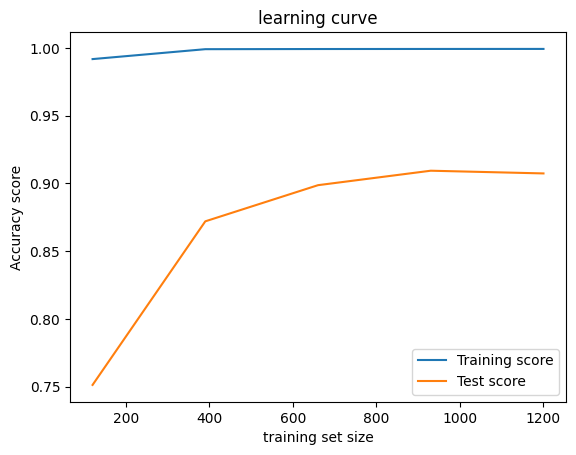

In [101]:
#Learning Curve
check_overfit(sc)

In [113]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create and train the model
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

# Make predictions
rf_tune_pred = rf.predict(x_test)

# Calculate accuracy
rf_tune_accuracy = accuracy_score(y_test, rf_tune_pred)
#set all the accuracy in data frame
evaluation = pd.DataFrame(data={'Model':['KNN classifier','DecisionTree classifier','LogisticRegression classifier','RandomForest classifier','Naive Bays','xgboost','Support Vector Machine','Stacking'], 'accuracy':[knn_accuracy,dec_pred_accuracy,logi_tune_accuracy,rf_tune_accuracy,nb_accuracy,xg_boost_accuracy,scv_accuracy,sc_accuracy]})



In [114]:
#sorting
evaluation=evaluation.sort_values(by=['accuracy'],ascending=False).reset_index(drop=True)

In [115]:
evaluation

,Model,accuracy
0,LogisticRegression classifier,0.948
1,Support Vector Machine,0.942
2,Stacking,0.936
3,xgboost,0.890
4,RandomForest classifier,0.888
5,DecisionTree classifier,0.848
6,Naive Bays,0.804
7,KNN classifier,0.512


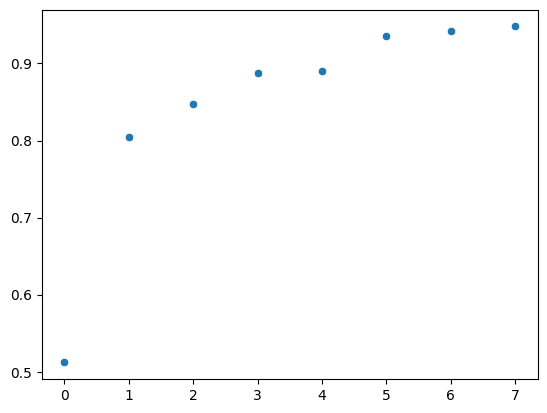

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt
#plot the scatter
sns.scatterplot(x=range(len(evaluation['accuracy'])),y=np.sort(evaluation['accuracy']))
plt.show()

In [118]:
# confusion_matrix
def conf(x,y):
  sns.heatmap(confusion_matrix(x,y_test),annot=True)
  plt.title(y)
  plt.show()

def classi(x,y):
  print(y)
  print(classification_report(x,y_test))

In [126]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Train Decision Tree
dec_tree = DecisionTreeClassifier()
dec_tree.fit(x_train, y_train)

# Make predictions (this defines the variable)
dec_pred = dec_tree.predict(x_test)

# Calculate accuracy
dec_pred_accuracy = accuracy_score(y_test, dec_pred)


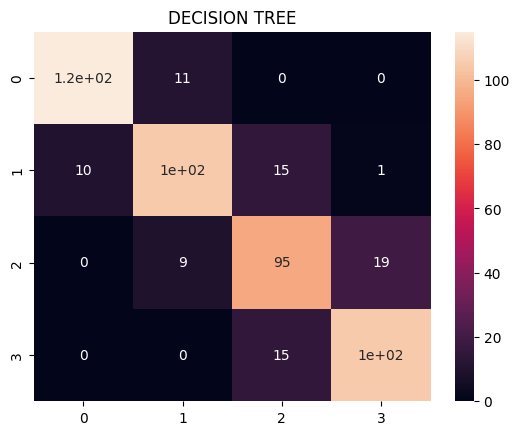

In [127]:
conf(dec_pred,'DECISION TREE')

In [129]:
from sklearn.metrics import classification_report
classi(dec_pred,'DECISION TREE')

DECISION TREE
              precision    recall  f1-score   support

           0       0.92      0.91      0.92       126
           1       0.84      0.80      0.82       131
           2       0.76      0.77      0.77       123
           3       0.84      0.88      0.86       120

    accuracy                           0.84       500
   macro avg       0.84      0.84      0.84       500
weighted avg       0.84      0.84      0.84       500



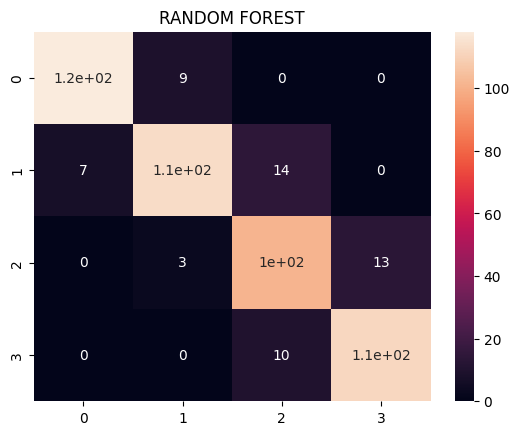

In [130]:
conf(rf_tune_pred,'RANDOM FOREST')

In [131]:
classi(rf_tune_pred,'RANDOM FOREST')

RANDOM FOREST
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       127
           1       0.90      0.84      0.87       134
           2       0.81      0.86      0.83       117
           3       0.90      0.92      0.91       122

    accuracy                           0.89       500
   macro avg       0.89      0.89      0.89       500
weighted avg       0.89      0.89      0.89       500



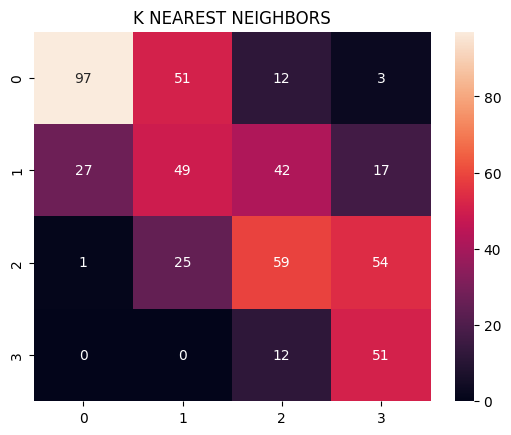

In [132]:
conf(knn_pred,'K NEAREST NEIGHBORS')

In [133]:
classi(knn_pred,'K NEAREST NEIGHBORS')

K NEAREST NEIGHBORS
              precision    recall  f1-score   support

           0       0.78      0.60      0.67       163
           1       0.39      0.36      0.38       135
           2       0.47      0.42      0.45       139
           3       0.41      0.81      0.54        63

    accuracy                           0.51       500
   macro avg       0.51      0.55      0.51       500
weighted avg       0.54      0.51      0.51       500



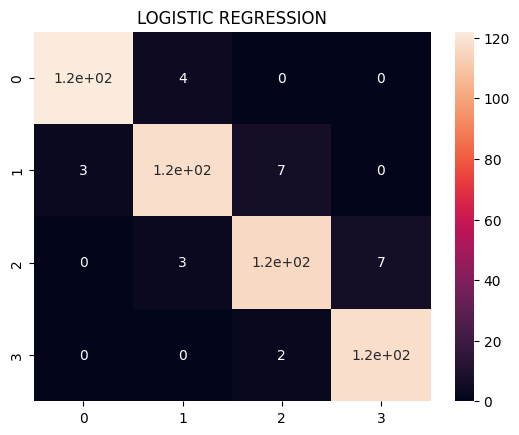

In [134]:
conf(logi_tune_pred,'LOGISTIC REGRESSION')

In [135]:
classi(logi_tune_pred,'LOGISTIC REGRESSION')

LOGISTIC REGRESSION
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       126
           1       0.94      0.92      0.93       128
           2       0.93      0.92      0.92       126
           3       0.94      0.98      0.96       120

    accuracy                           0.95       500
   macro avg       0.95      0.95      0.95       500
weighted avg       0.95      0.95      0.95       500



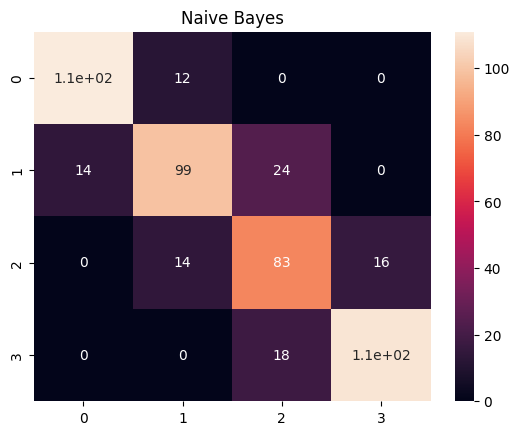

In [136]:
conf(nb_pred,'Naive Bayes')

In [137]:
classi(nb_pred,'Naive Bayes')

Naive Bayes
              precision    recall  f1-score   support

           0       0.89      0.90      0.90       123
           1       0.79      0.72      0.76       137
           2       0.66      0.73      0.70       113
           3       0.87      0.86      0.87       127

    accuracy                           0.80       500
   macro avg       0.80      0.80      0.80       500
weighted avg       0.81      0.80      0.80       500



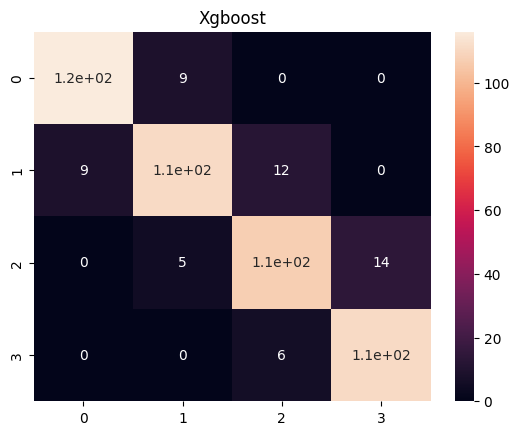

In [138]:
conf(xgb_pred,'Xgboost')

In [139]:
classi(xgb_pred,'Xgboost')

Xgboost
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       125
           1       0.89      0.84      0.86       132
           2       0.86      0.85      0.85       126
           3       0.89      0.95      0.92       117

    accuracy                           0.89       500
   macro avg       0.89      0.89      0.89       500
weighted avg       0.89      0.89      0.89       500



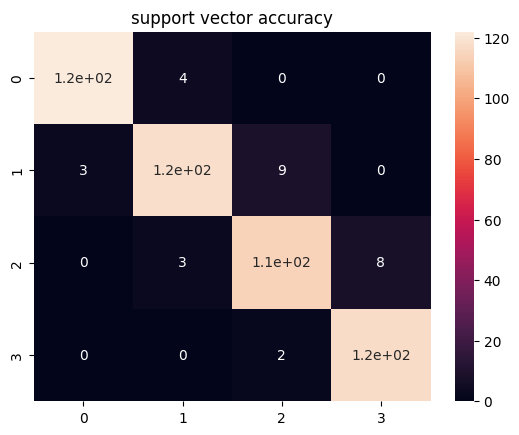

In [140]:
conf(scv_pred,'support vector accuracy')

In [141]:
classi(scv_pred,'support vector accuracy')

support vector accuracy
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       126
           1       0.94      0.91      0.93       130
           2       0.91      0.91      0.91       125
           3       0.94      0.98      0.96       119

    accuracy                           0.94       500
   macro avg       0.94      0.94      0.94       500
weighted avg       0.94      0.94      0.94       500



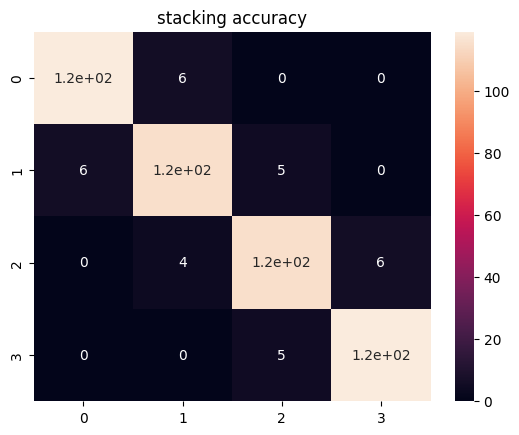

In [142]:
conf(sc_pred,'stacking accuracy')

In [143]:
classi(sc_pred,'stacking accuracy')

stacking accuracy
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       125
           1       0.92      0.91      0.92       126
           2       0.92      0.92      0.92       125
           3       0.95      0.96      0.96       124

    accuracy                           0.94       500
   macro avg       0.94      0.94      0.94       500
weighted avg       0.94      0.94      0.94       500



In [149]:

# feature importance
features = independent_varaible
importances = rf_tune.feature_importances_
indices = np.argsort(importances)


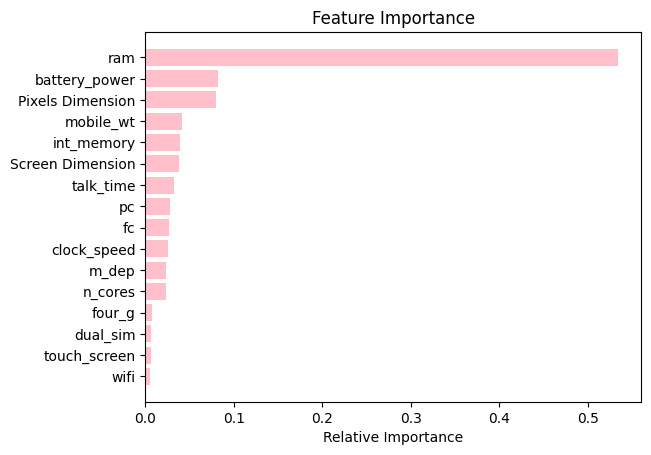

In [150]:
# plot the graph
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='pink', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

In [151]:
# new dataframe with important features
new_df = df[['ram','battery_power','Pixels Dimension','mobile_wt','int_memory','Screen Dimension','talk_time','pc','clock_speed','fc','price_range']]


In [152]:
new_df.head()

,ram,battery_power,Pixels Dimension,mobile_wt,int_memory,Screen Dimension,talk_time,pc,clock_speed,fc,price_range
0,2.549,842,15120,188,7,63,19,2,2.2,1,1
1,2.631,1021,1799140,136,53,51,7,6,0.5,0,2
2,2.603,563,2167308,145,41,22,9,6,0.5,2,2
3,2.769,615,2171776,131,10,128,11,9,2.5,0,2
4,1.411,1821,1464096,141,44,16,15,14,1.2,13,1


In [153]:

new_df.shape

(2000, 11)

In [154]:
dependent_variable ='price_range'
independent_varaible = list(set(new_df.columns.tolist())-{dependent_variable})


x=new_df[independent_varaible].values
y=new_df[dependent_variable].values


x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42,stratify=y)


stand = StandardScaler()
x_train = stand.fit_transform(x_train)
x_test = stand.transform(x_test)



vb = StackingClassifier(estimators=estimators,passthrough=True,n_jobs=-1)
vb.fit(x_train,y_train)
vb_pred = vb.predict(x_test)
vb_accuracy = accuracy_score(vb_pred,y_test)
vb_accuracy

0.93

In [155]:
vb.predict(x_train)

array([2, 3, 1, ..., 3, 0, 0])

In [6]:
from sklearn.metrics import accuracy_score

def check_overfit(model, x_train, y_train, x_test, y_test):
    """
    Checks if a model is overfitting by comparing training and testing accuracy.
    """
    # Predictions
    train_pred = model.predict(x_train)
    test_pred = model.predict(x_test)

    # Accuracy
    train_acc = accuracy_score(y_train, train_pred)
    test_acc = accuracy_score(y_test, test_pred)

    print(f"Training Accuracy: {train_acc:.4f}")
    print(f"Testing Accuracy:  {test_acc:.4f}")

    if train_acc > test_acc + 0.05:  # Overfitting threshold
        print("Warning: Model might be overfitting")
    else:
        print("Model seems fine")

In [19]:
# 1. Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# 2. Load dataset
df = pd.read_csv('/content/data_mobile_price_range.csv')

# 3. Features and target
X = df.drop('price_range', axis=1)
y = df['price_range']

# 4. Train-test split
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 5. Scaling (required for KNN)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# 6. Find best K
error = []

for i in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred = knn.predict(x_test)
    error.append(np.mean(pred != y_test))

best_k = error.index(min(error)) + 1
print("Best K:", best_k)

# 7. Final model
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(x_train, y_train)

print("Final Accuracy:", knn.score(x_test, y_test))

from sklearn.ensemble import RandomForestClassifier

vb = RandomForestClassifier()  # define the model
vb.fit(x_train, y_train)

Best K: 44
Final Accuracy: 0.63


RandomForestClassifier()

In [31]:
check_overfit(rf_tune, x_train, y_train, x_test, y_test)


Training Accuracy: 1.0000
Testing Accuracy:  0.8775


In [34]:
from sklearn.metrics import classification_report
vb_pred = vb.predict(x_test)
print(classification_report(vb_pred,y_test))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       106
           1       0.88      0.82      0.85        97
           2       0.83      0.78      0.80        98
           3       0.85      0.96      0.90        99

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.87       400
weighted avg       0.88      0.88      0.88       400



In [39]:
from sklearn.decomposition import PCA
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
estimators = [
    ('dt', DecisionTreeClassifier()),
    ('knn', KNeighborsClassifier())
]

pca= PCA(n_components=9)
x_train_1 = pca.fit_transform(x_train)
x_test_1 = pca.transform(x_test)
lv = StackingClassifier(estimators=estimators,passthrough=True,n_jobs=-1)
lv.fit(x_train_1,y_train)
y_pred = lv.predict(x_test_1)
print(accuracy_score(y_pred,y_test))

0.4175


<Axes: >

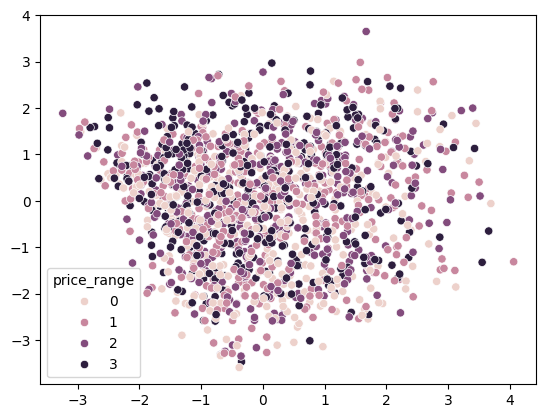

In [41]:
import seaborn as sns
pca= PCA(n_components=2)
x_train_trf = pca.fit_transform(x_train)
x_test_trf = pca.transform(x_test)
sns.scatterplot(x=x_train_trf[:,0],y=x_train_trf[:,1],hue=y_train)

In [51]:
# deployment using pickle
import pickle
#dump the best model
pickle.dump(vb,open('/content/stack.pkl','wb'))
pickle.dump(new_df,open('/content/new_df.pkl','wb'))

In [52]:
model=pickle.load(open('/content/vb.pkl','rb'))

In [53]:
model.predict(x_train)

array([1, 2, 0, ..., 2, 3, 1])

In [54]:
accuracy_score(model.predict(x_train),y_train)

1.0

In [55]:
accuracy_score(model.predict(x_test),y_test)

0.8775

In [56]:
new_df.head(2)

,A,B
2,3,7
3,4,8


In [57]:
new_df.shape

(2, 2)